In [1]:
from esda.moran import Moran
import geopandas as gpd
from libpysal.weights import DistanceBand, KNN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from splot.esda import plot_moran
import statsmodels.api as sm
import sys

from statshelper import q_q_plot

In [2]:
df = pd.read_csv("./data/processed/Cleaned_Chicago_Sales.csv")
df.head()

,Unnamed: 0,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,...,Bool-Type of Residence-1,Bool-Type of Residence-2,Bool-Type of Residence-4,Bool-Type of Residence-8,Bool-Type of Residence-7,Bool-Type of Residence-6,Bool-Wall Material-2,Bool-Wall Material-3,Bool-Wall Material-1,Bool-Wall Material-4
0,2,16094150130000,211,13,-0.297580,77,3.0,6.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,5,4252000820000,204,100,2.868180,25,5.0,0.0,2.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2,8,14322110150000,208,12,-0.596010,74,3.0,0.0,2.0,6.0,...,0,0,0,0,0,0,1,0,0,0
3,9,27021200080000,204,34,1.698873,28,1.0,0.0,3.0,1.0,...,1,0,0,0,0,0,0,1,0,0
4,11,13121080620000,204,42,0.515768,71,1.0,0.0,2.0,1.0,...,1,0,0,0,0,0,1,0,0,0


In [3]:
i_vars = [
    'Age',
    'Age Decade',
    'Bedrooms',  
    'Building Square Feet', 
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Full Baths',
    'Garage 1 Area',
    'Garage 2 Area', 
    'Half Baths', 
    'Land Square Feet',
    'Lot Size Squared',
    'Rooms',
    'Sale Quarter'
    ]
dep_var = ['Sale Price']
X = df[i_vars]
y = df[dep_var]

In [4]:
X_cons = sm.add_constant(X)
ols = sm.OLS(y, X_cons, name_y=dep_var, name_x=i_vars).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 4.810e+04
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:50:29   Log-Likelihood:            -2.8590e+05
No. Observations:              324261   AIC:                         5.718e+05
Df Residuals:                  324247   BIC:                         5.720e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1192      0.010   -109.405      0.000      -1.139      -1.099
Age                  -3.869e+09    7.6e+09     -0.509      0.611   -1.88e+10     1.1e+10
Age Decade            3.869e+09    7.6e+09      0.509      0.611    -1.1e+10    1.88e+10
Bedrooms                -0.0117      0.002     -5.519      0.000      -0.016      -0.008
Building Square Feet     0.0187      0.002      7.764      0.000       0.014       0.023
Estimate (Building)      0.5069      0.002    309.872      0.000       0.504       0.510
Estimate (Land)          0.3454      0.002    221.416      0.000       0.342       0.348
Fireplaces               0.0119      0.001      9.385      0.000       0.009       0.014
Full Baths              -0.0036      0.002     -1.996      0.046      -0.007   -6.59e-05
Garage 1 Area            0.0377      0.001     34.996      0.000       0.036       0.040
Garage 2 Area            0.0004      0.001      0.397      0.691      -0.002       0.002
Half Baths               0.0279      0.001     23.481      0.000       0.026       0.030
Land Square Feet      1.126e+06   2.21e+06      0.509      0.611   -3.21e+06    5.46e+06
Lot Size Squared     -1.126e+06   2.21e+06     -0.509      0.611   -5.46e+06    3.21e+06
Rooms                    0.0158      0.002      6.529      0.000       0.011       0.021
Sale Quarter             0.0142      0.000    109.959      0.000       0.014       0.014
==============================================================================
Omnibus:                    49310.114   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264623.428
Skew:                          -0.630   Prob(JB):                         0.00
Kurtosis:                       7.242   Cond. No.                     5.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.81e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

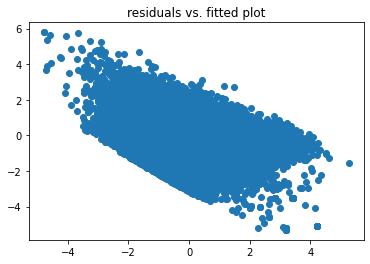

In [5]:
plt.scatter(ols.predict(), ols.resid)
plt.title("residuals vs. fitted plot")
plt.show()

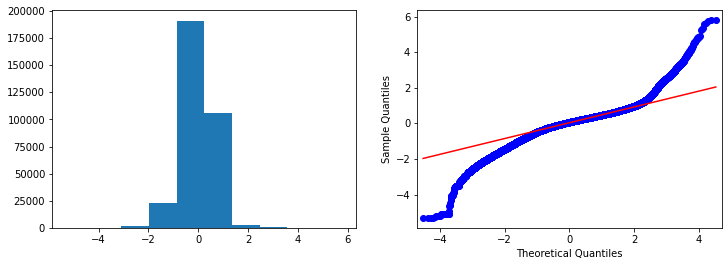

In [6]:
q_q_plot(ols.resid)

In [7]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:26916")

<AxesSubplot:>

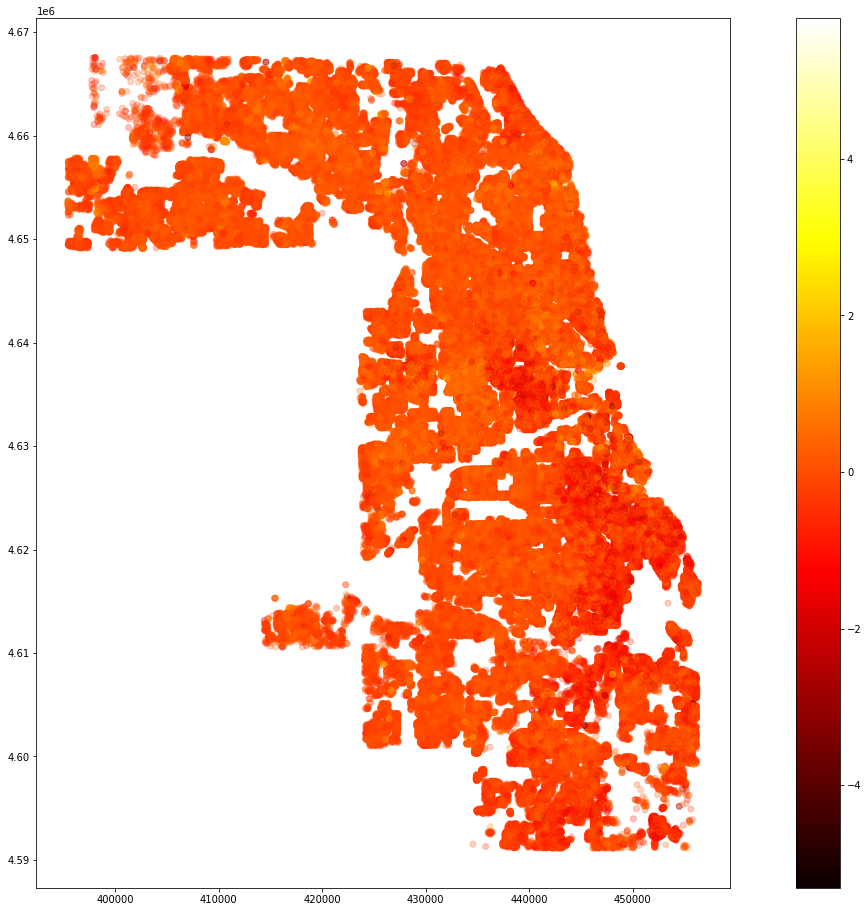

In [8]:
gdf.plot(column=ols.resid, cmap="hot", legend=True,
         alpha=0.25, figsize=(24,16))

In [12]:
# be careful as this can take a lot of ram
#w = DistanceBand.from_dataframe(gdf,threshold=750)
w = KNN.from_dataframe(gdf, k=256)

In [13]:
w.transform = 'R'

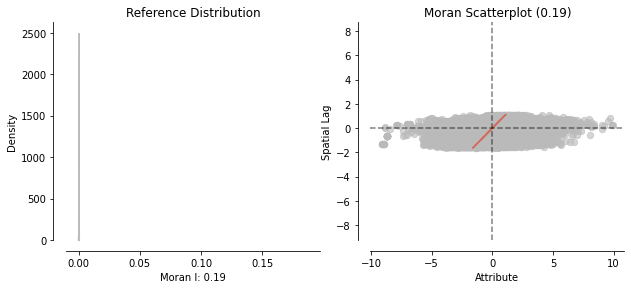

In [14]:
ols_moran = Moran(ols.resid, w, permutations=199)
plot_moran(ols_moran, zstandard=True, figsize=(10,4))
plt.show()